# Baseline Concept

##### Random Baseline [accuracy : 0.125]

Random pick of a movement is the simplest prediction : 1 good prediction out of 8 movements

In [1]:
#Occurence of movement :
{'abstract': 0.125,'color_field_painting': 0.125,
 'cubism': 0.125, 'expressionism': 0.125,
 'impressionism': 0.125, 'realism': 0.125,
 'renaissance': 0.125, 'romanticism': 0.125}

{'abstract': 0.125,
 'color_field_painting': 0.125,
 'cubism': 0.125,
 'expressionism': 0.125,
 'impressionism': 0.125,
 'realism': 0.125,
 'renaissance': 0.125,
 'romanticism': 0.125}

That's not satisfactory, let's try using human basic visual analysis of paintings :
we can detect colors and shapes with our eyes, maybe simple models could use these informations to predict a movement ?

##### Color Based Analysis - Average Color [accuracy : 0.14]

First solution is average color analysis, we can look at every pixel of a painting, and compute the average color of the image.  
Doing the same with every painting in our training dataset, we can compute the average color of the movement.
    
Now it's easy, MAE is computed for each painting vs every movement to make the predictions.

##### Color Based Analysis - Dominant Color [accuracy : 0.23]

Since paintings are not monochromatic, more complex prediction could be done letting us hope for a better accuracy:  
one can believe that Renaissance paintings use darker palettes of colors than impressionism or cubism, it could be the principle of another prediction.


We are looking for the n-dominant colors (in our case we chose 5 colors, but the function let you choose **n** as an argument) of a picture using Kmeans classification. 

<div>
<img src=attachment:image.png width="400"/>
</div>                                       
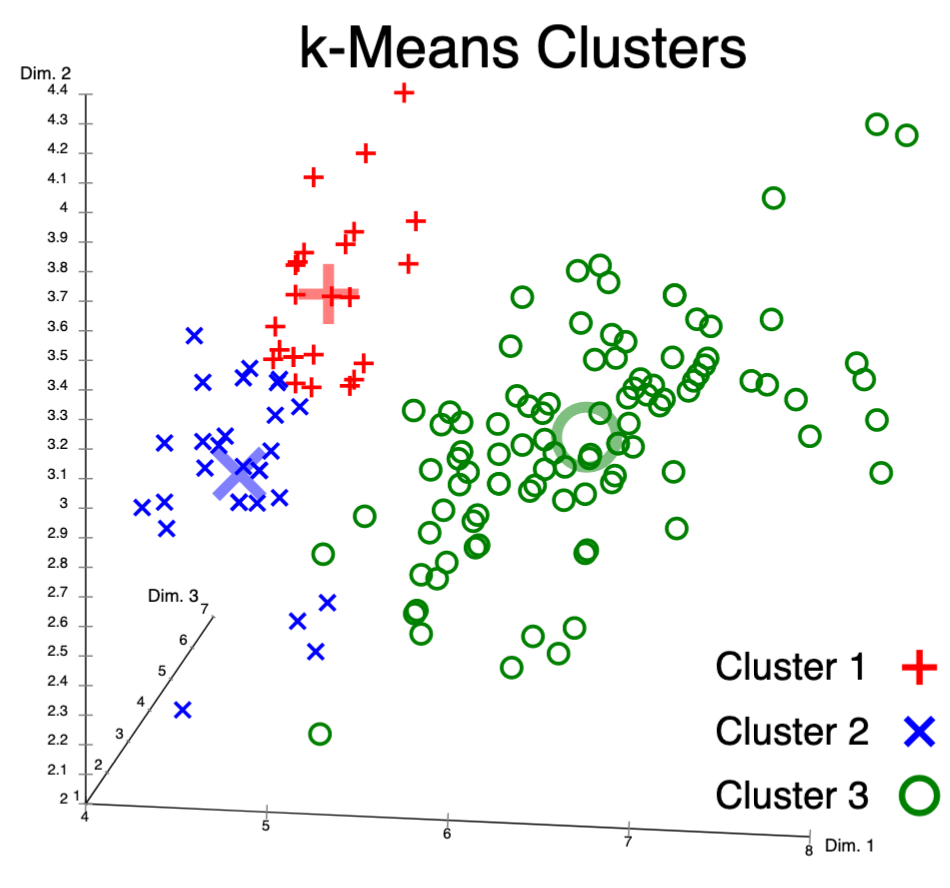

No pixel in our painting may be the same color of computed dominant colors, but these dominant colors are those that represent the most pixel's colors (they could be called synthetic colors since they do not really exist).  
Every dominant color is computed with its associated weight that represents the proportion of pixel in the image that is closest to this color.  

Condidering movement's dominant colors, we were not pleased with calculating the average dominant colors from our paintings, since it would somehow compute another synthetic color out of synthetic colors.  
So we chose a heavier approach in terms of computing:  
 - We looked at every pixel in every picture of our movements in our dataset and we did the same Kmeans classification.

For each movement, color analysis can be represented this way (band's width is the weight of the color):

<div>
<img src=attachment:image.png width="400"/>
</div>
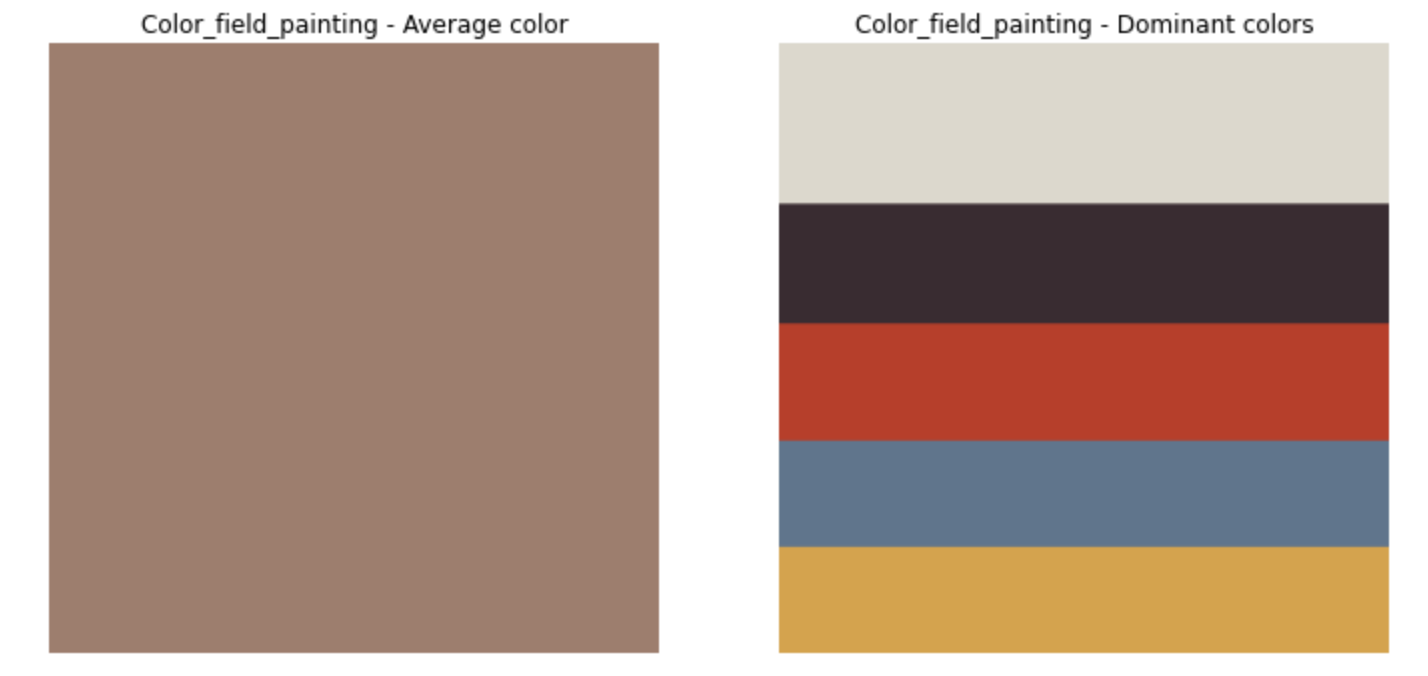

<div>
<img src=attachment:image.png width="400"/>
</div>      
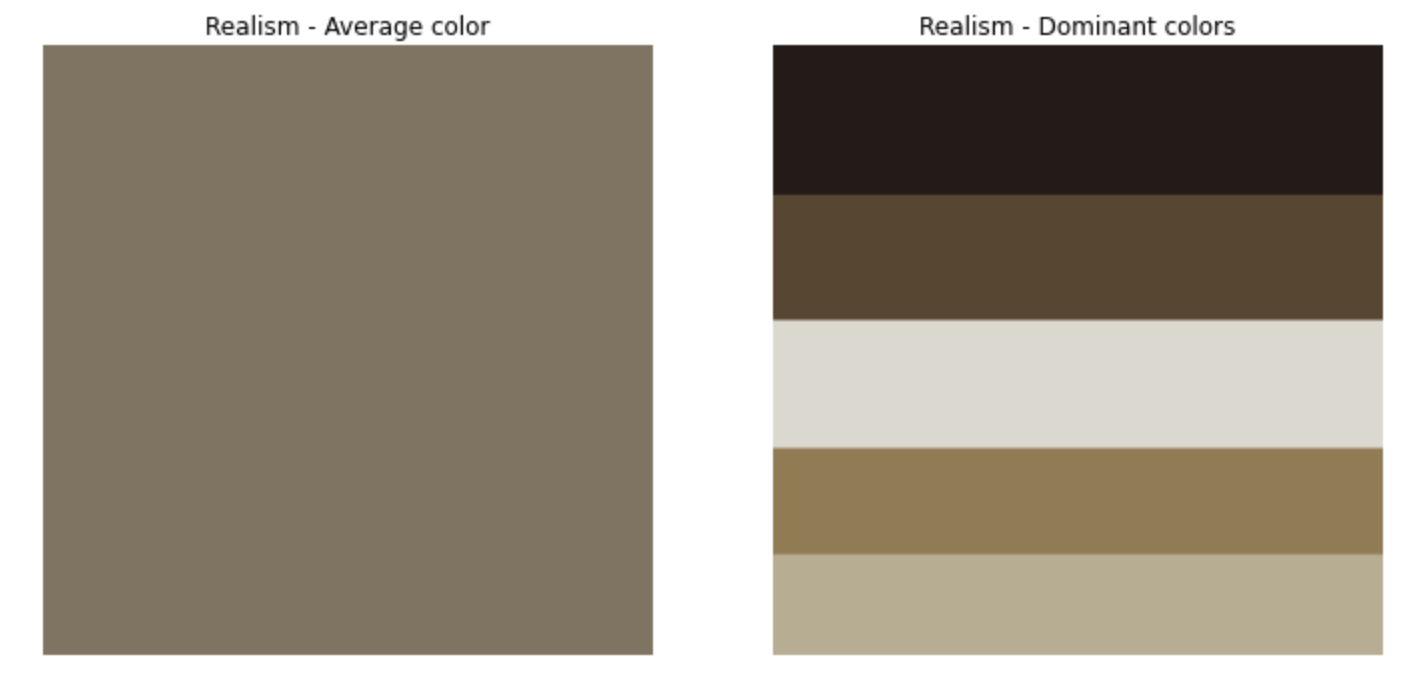

Prediction are being made using MAE on dominant colors, using weights of both painting's and movement's dominant colors.  
Loss is computed for colors with higher similarities.

##### Shape Analysis - Fourier Transform [accuracy : 0.25]

Apart from colors, human eyes can detect shapes and contrasts in paintings.  
Using Fourier Transform (FFT) on images is a good way to compare their occurence in paintings and therefore in movements.

Without diving too much into theory, this technique states that images can be decomposed in a serie of frequential images, weighted in amplitude: 

<div>
<img src=attachment:image-2.png width="400"/>
</div>
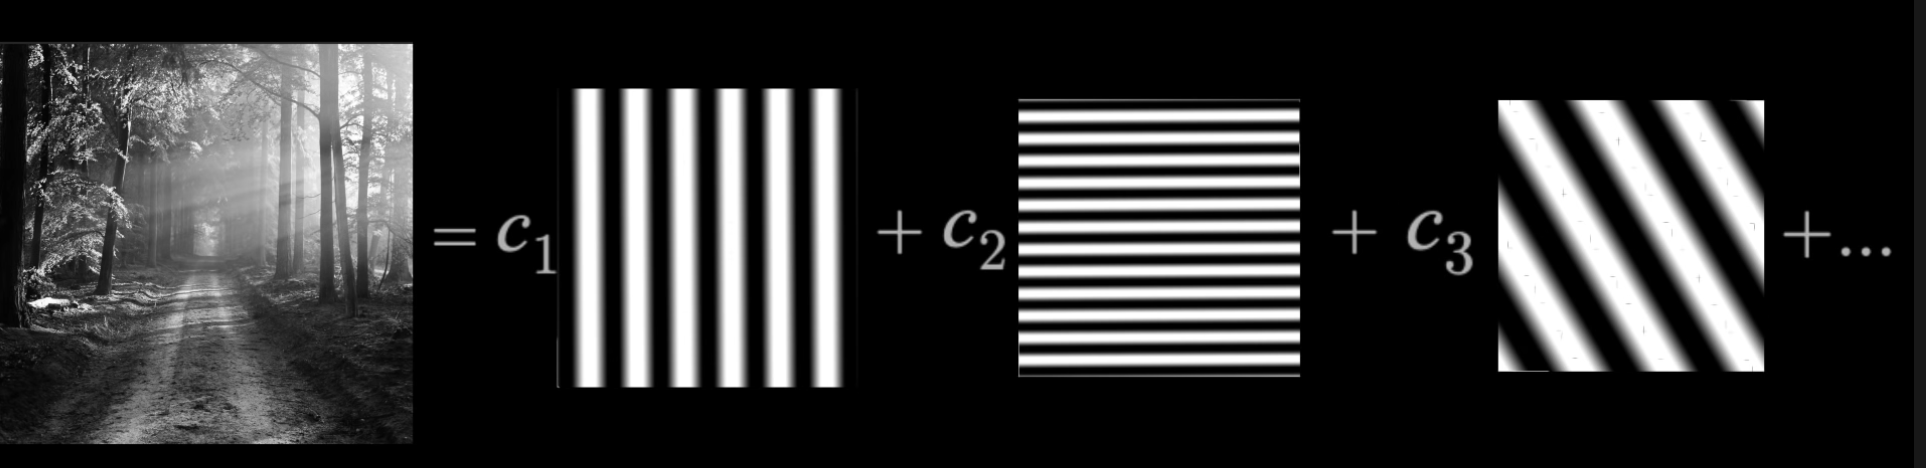

<div>
<img src=attachment:image.png width="400"/>
</div>
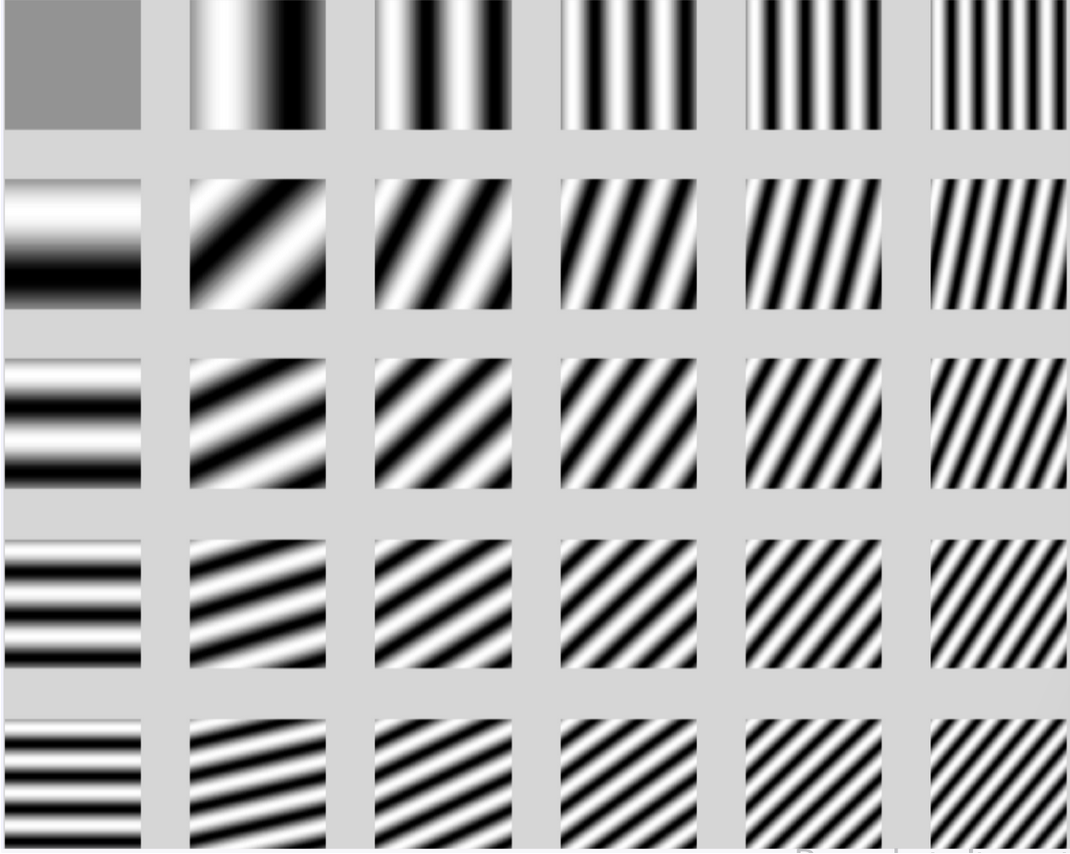

For a basic addition of sinusoid (horizontal and vertical lines), the FFT of the image will be dots :

<div>
<img src=attachment:image.png width="400"/>
</div>
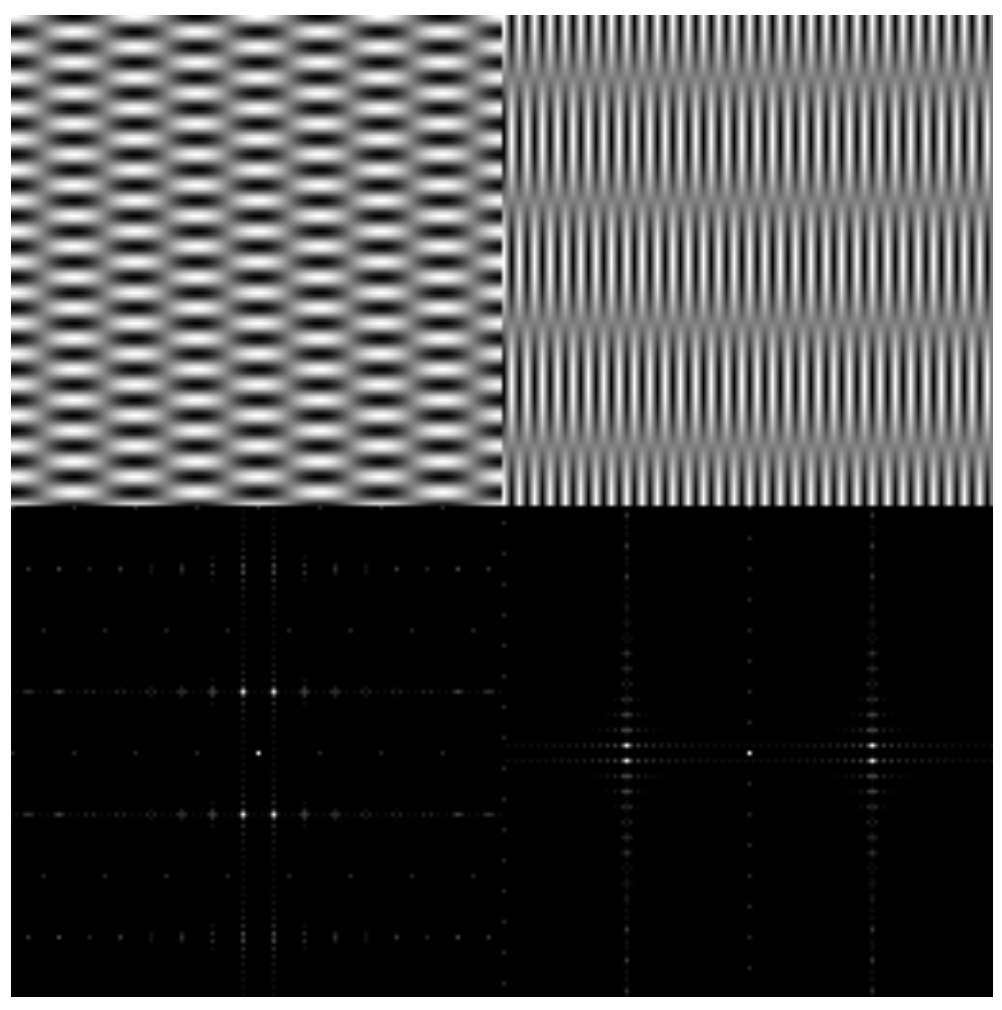

This technique makes the distinction between high and low frequencies in contrast : 

<div>
<img src=attachment:image.png width="400"/>
</div>
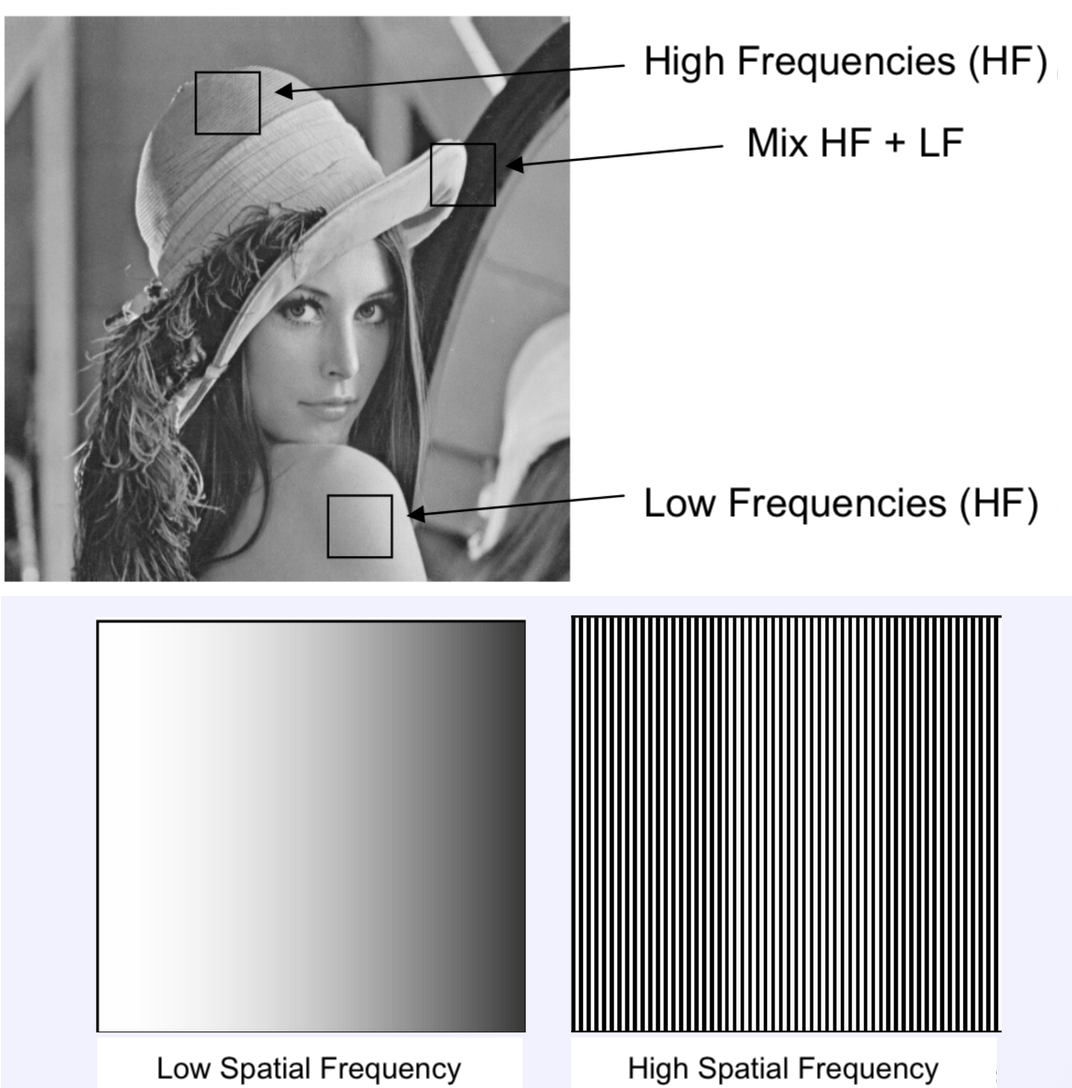

High spatial frequencies are on the edges of the Magnitude Spectrum  
Common shapes (director lines; horizontal lines; vertical lines; circles) are highlighted in the Fourier transform of an image:

<div>
<img src=attachment:image.png width="400"/>
</div>
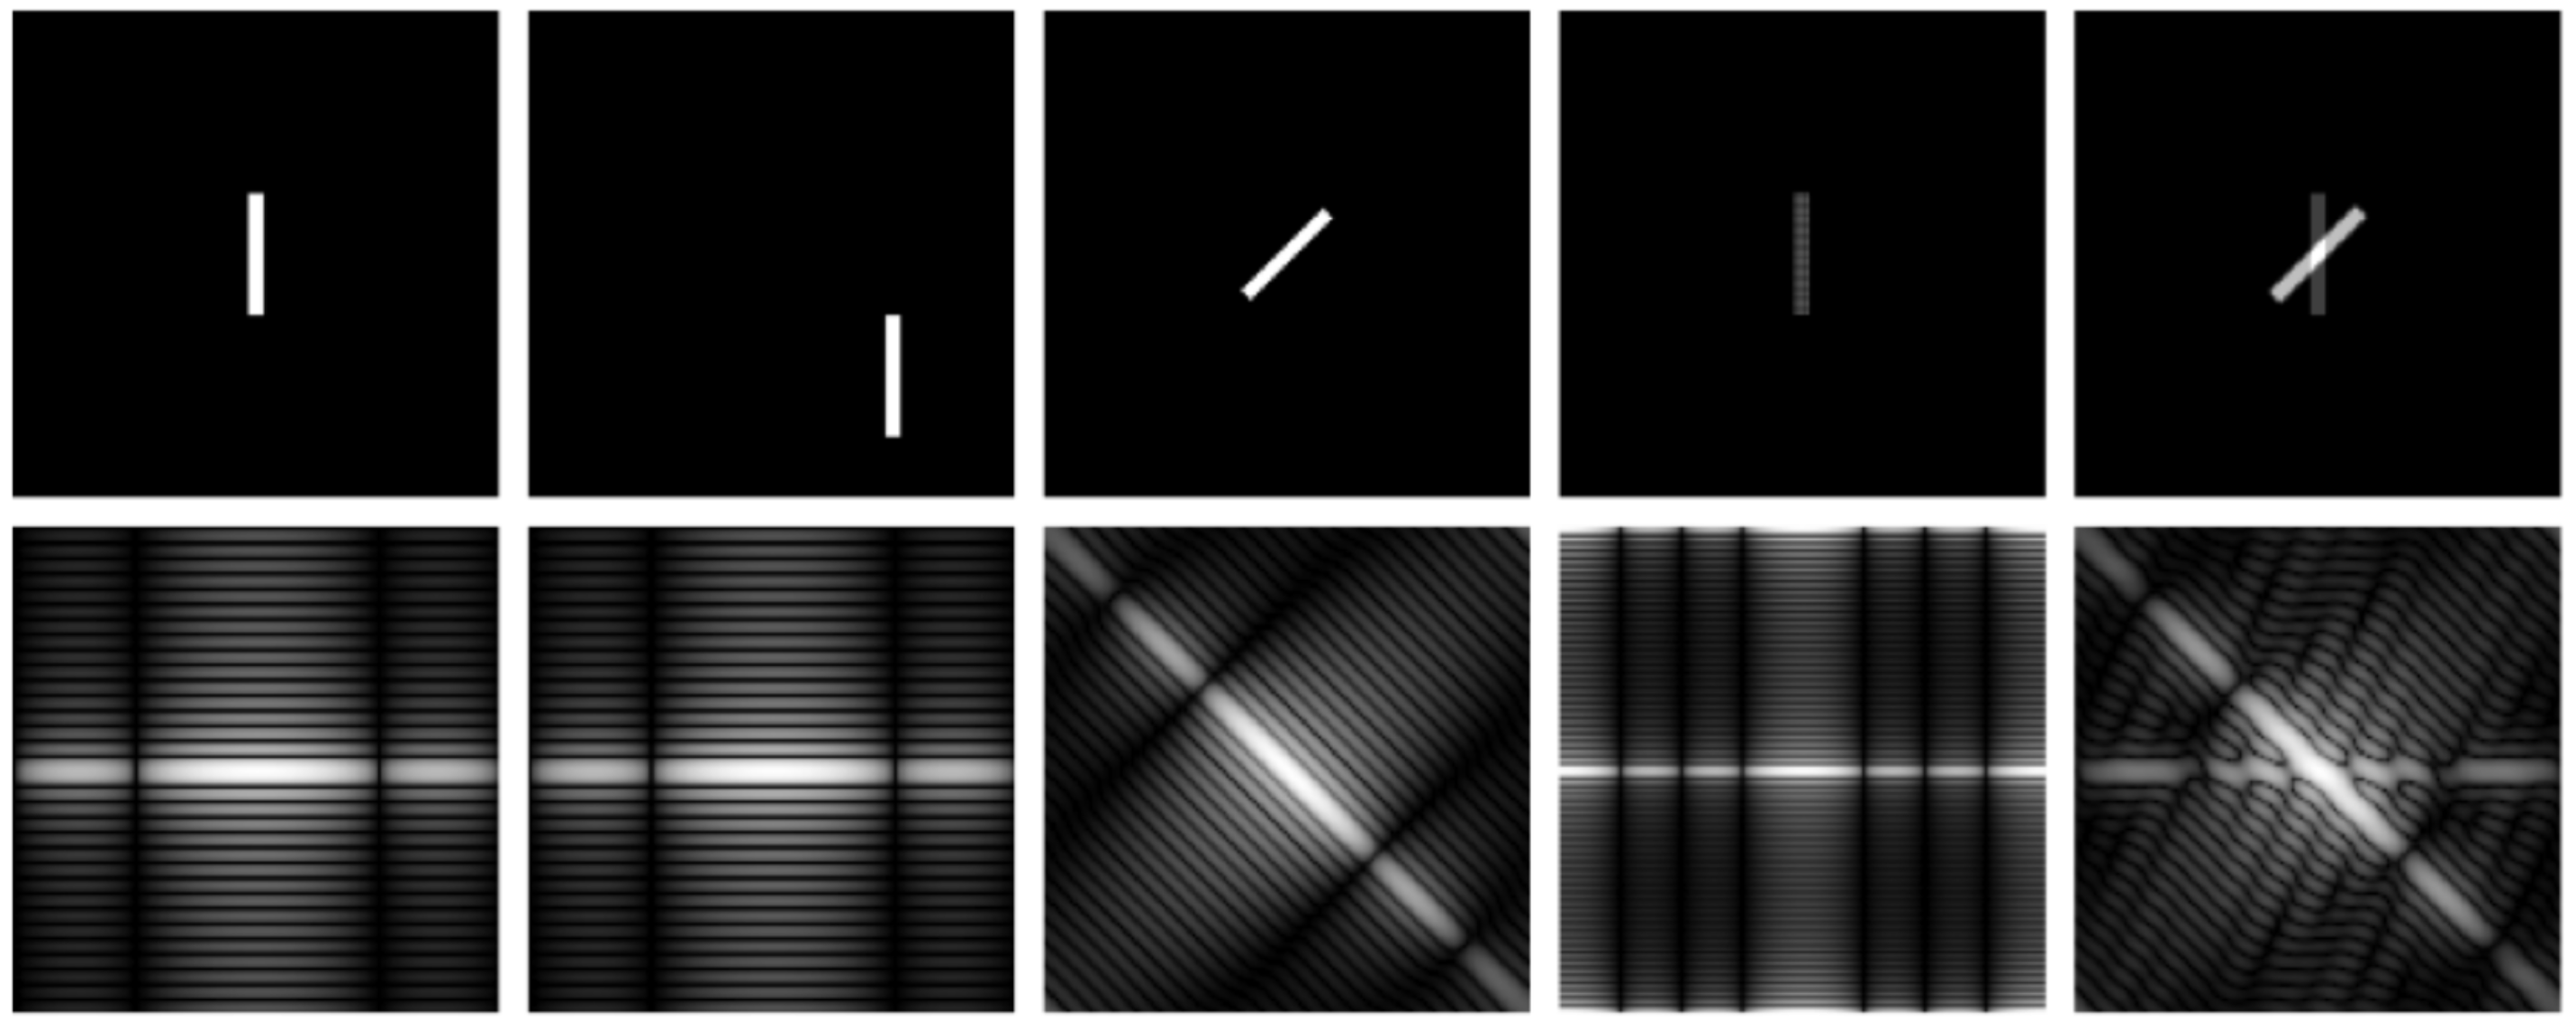

<div>
<img src=attachment:image.png width="200"/>
</div>
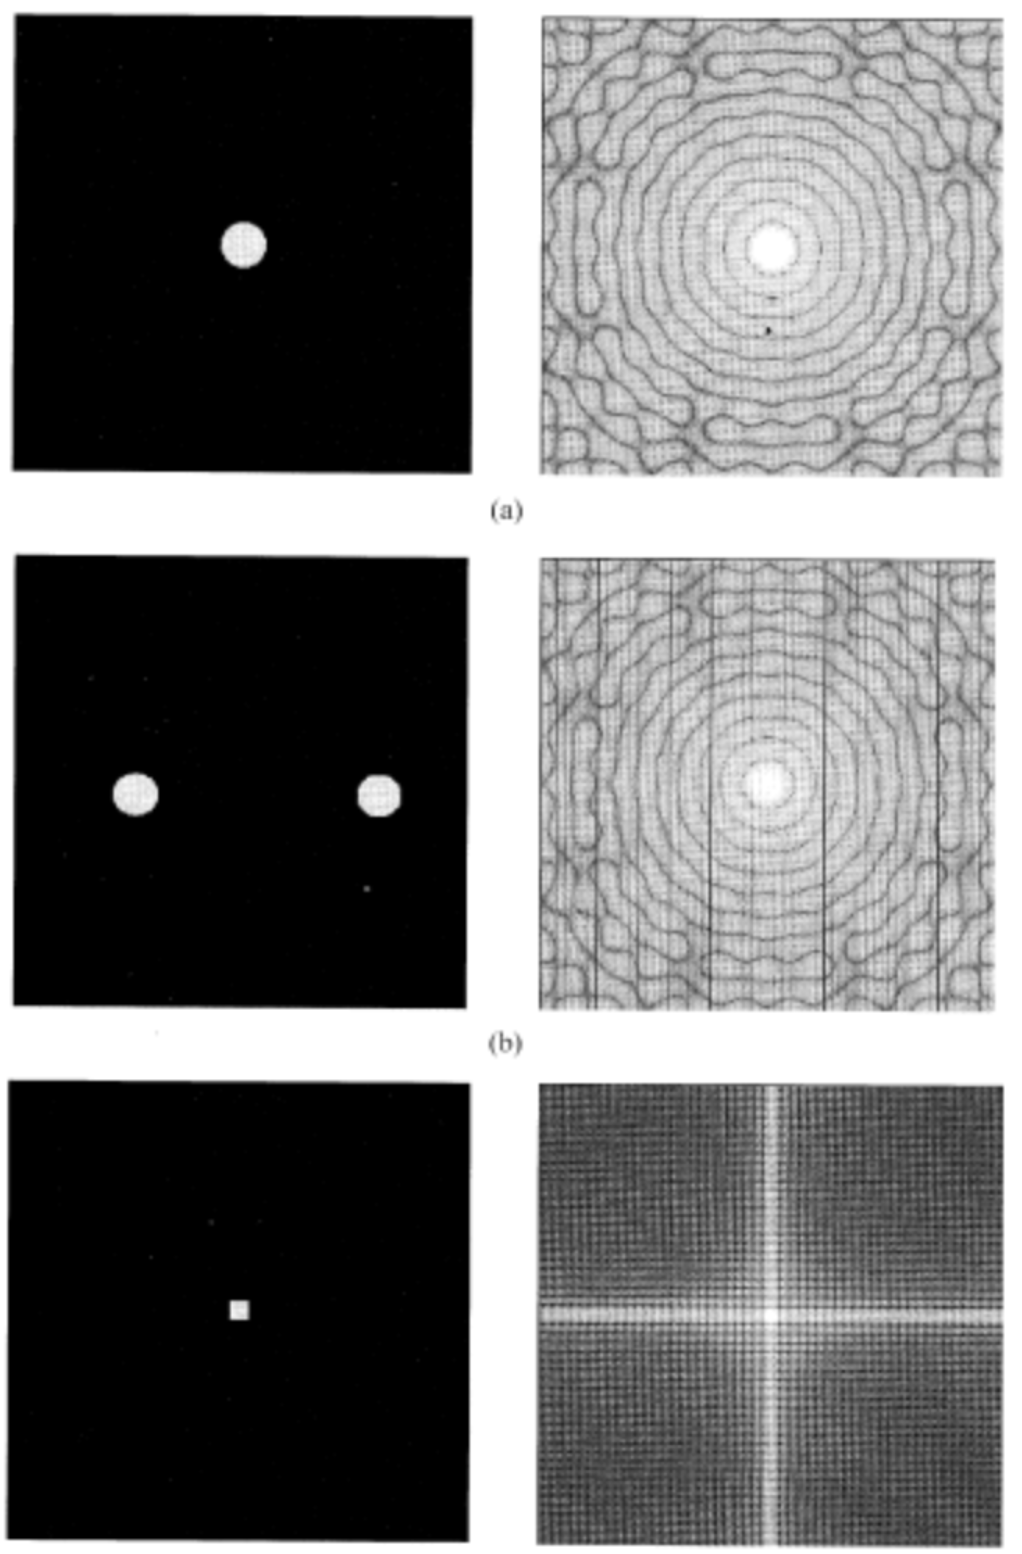

Only Magnitude is shown, hence showing no dependance to spatial phase:

<div>
<img src=attachment:image.png width="400"/>
</div>
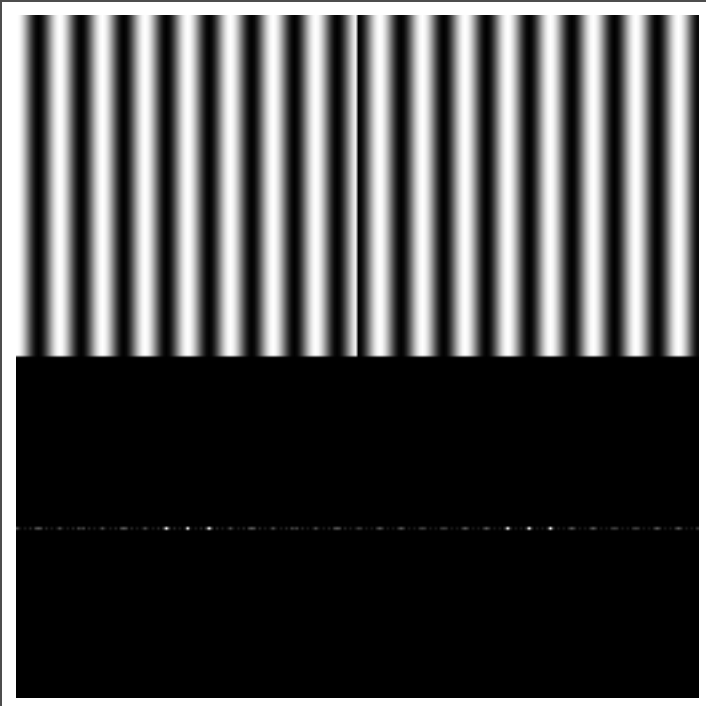

<blockquote>Note that both have the same FT MAGNITUDE image. The PHASE images would be different, of course. We generally do not display PHASE images because most people who see them shortly thereafter succomb to hallucinogenics or end up in a Tibetan monastery.</blockquote>
ref : https://www.cs.unm.edu/~brayer/vision/fourier.html

Director lines, shapes, orientations and contrast changes can be identified in images and reproduced in the magnitude spectrum plot:

<div>
<img src=attachment:image.png width="400"/>
</div>
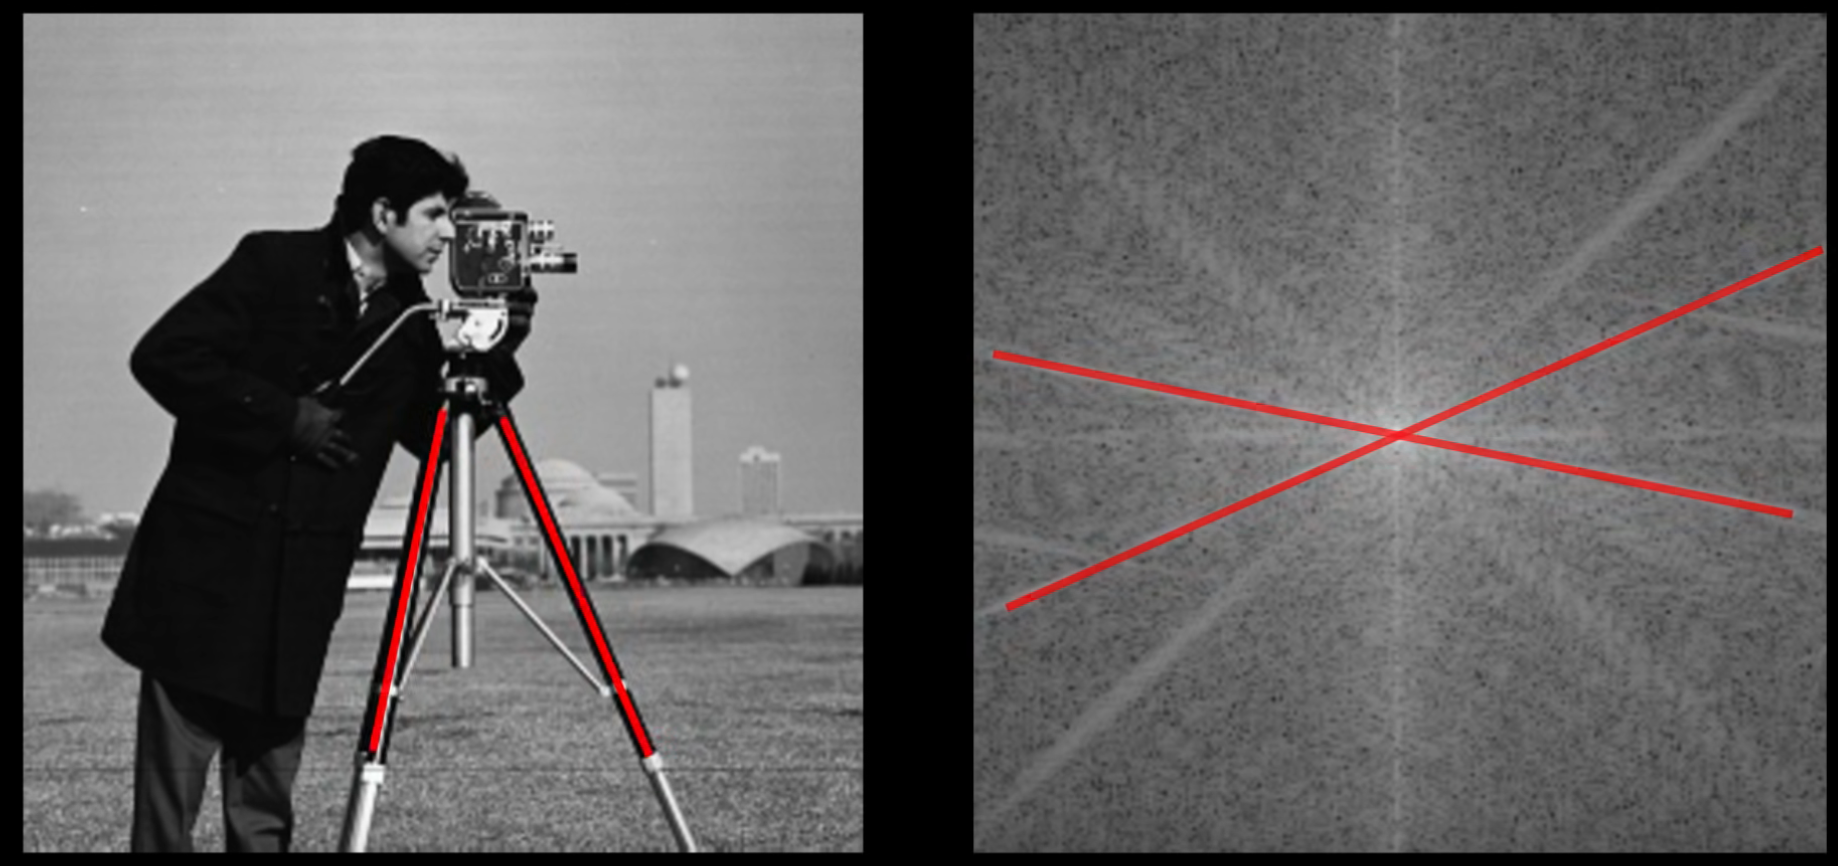

<div>
<img src=attachment:image.png width="400"/>
</div>
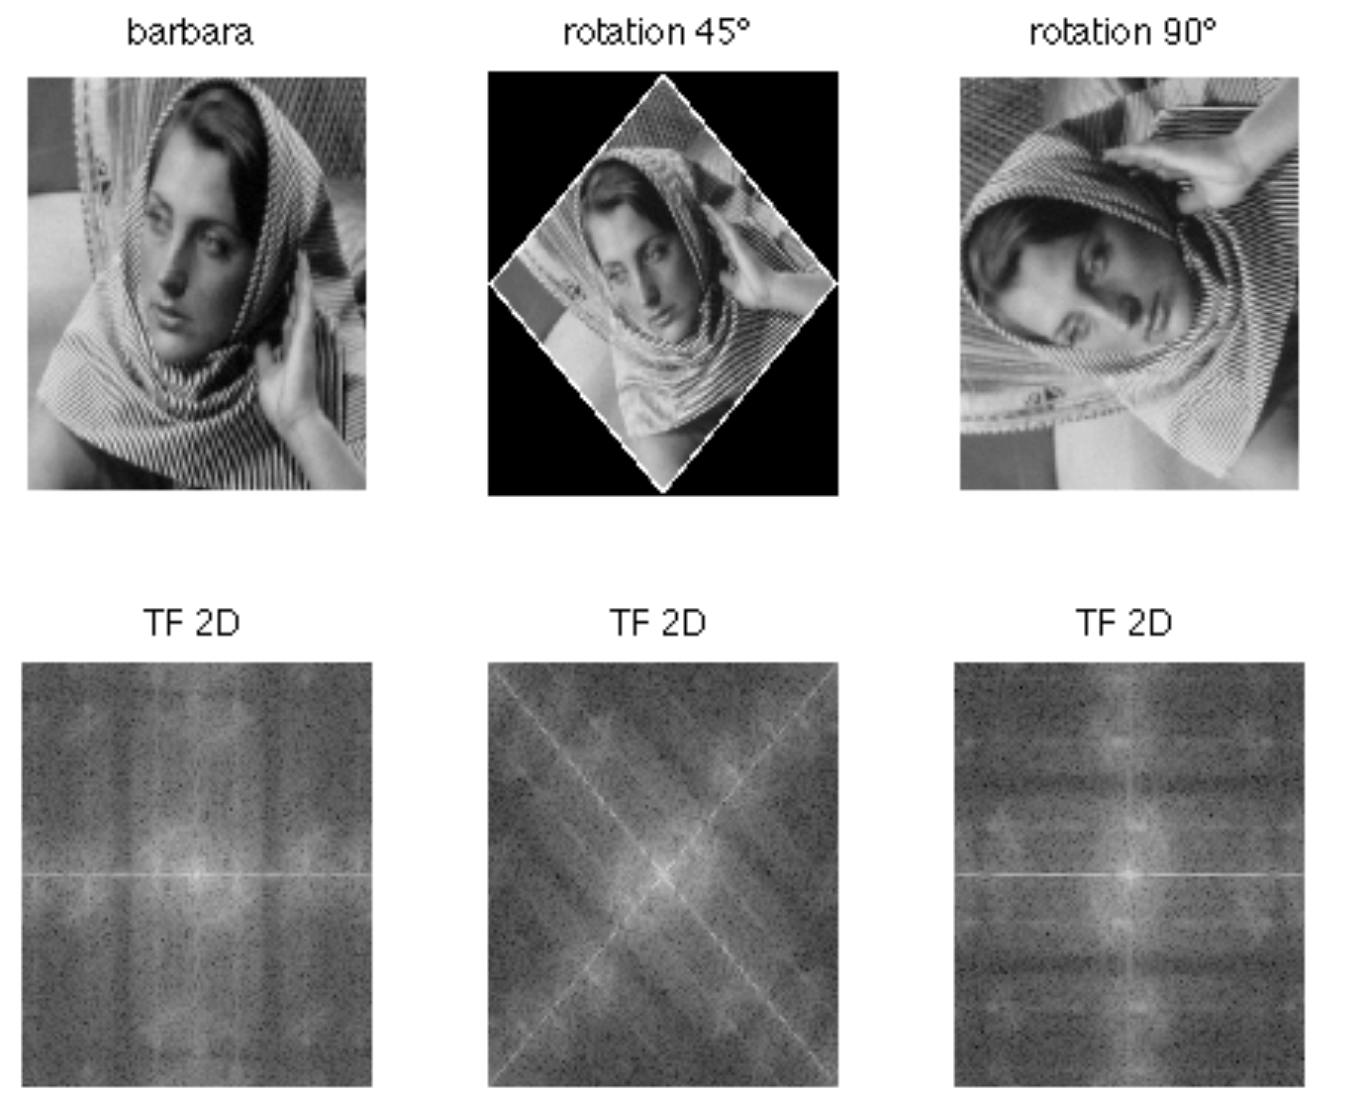

Hence, the same could be done for artistics movements, we can suppose that realism shapes will differ from cubist shapes, and that pointillism contrast will differ from realism contrasts.

Mean FFT transform in computed for each movement, and picture FFT is compared to movements to check the closest ones.

<div>
<img src=attachment:image.png width="400"/>
</div>

While dominant colors are similar, FFT shows notable (algorithms can see what would be hard to see for a human eye) differences in high frequencies.  

**To make a prediction, MAE is computed for each painting versus every movement.**
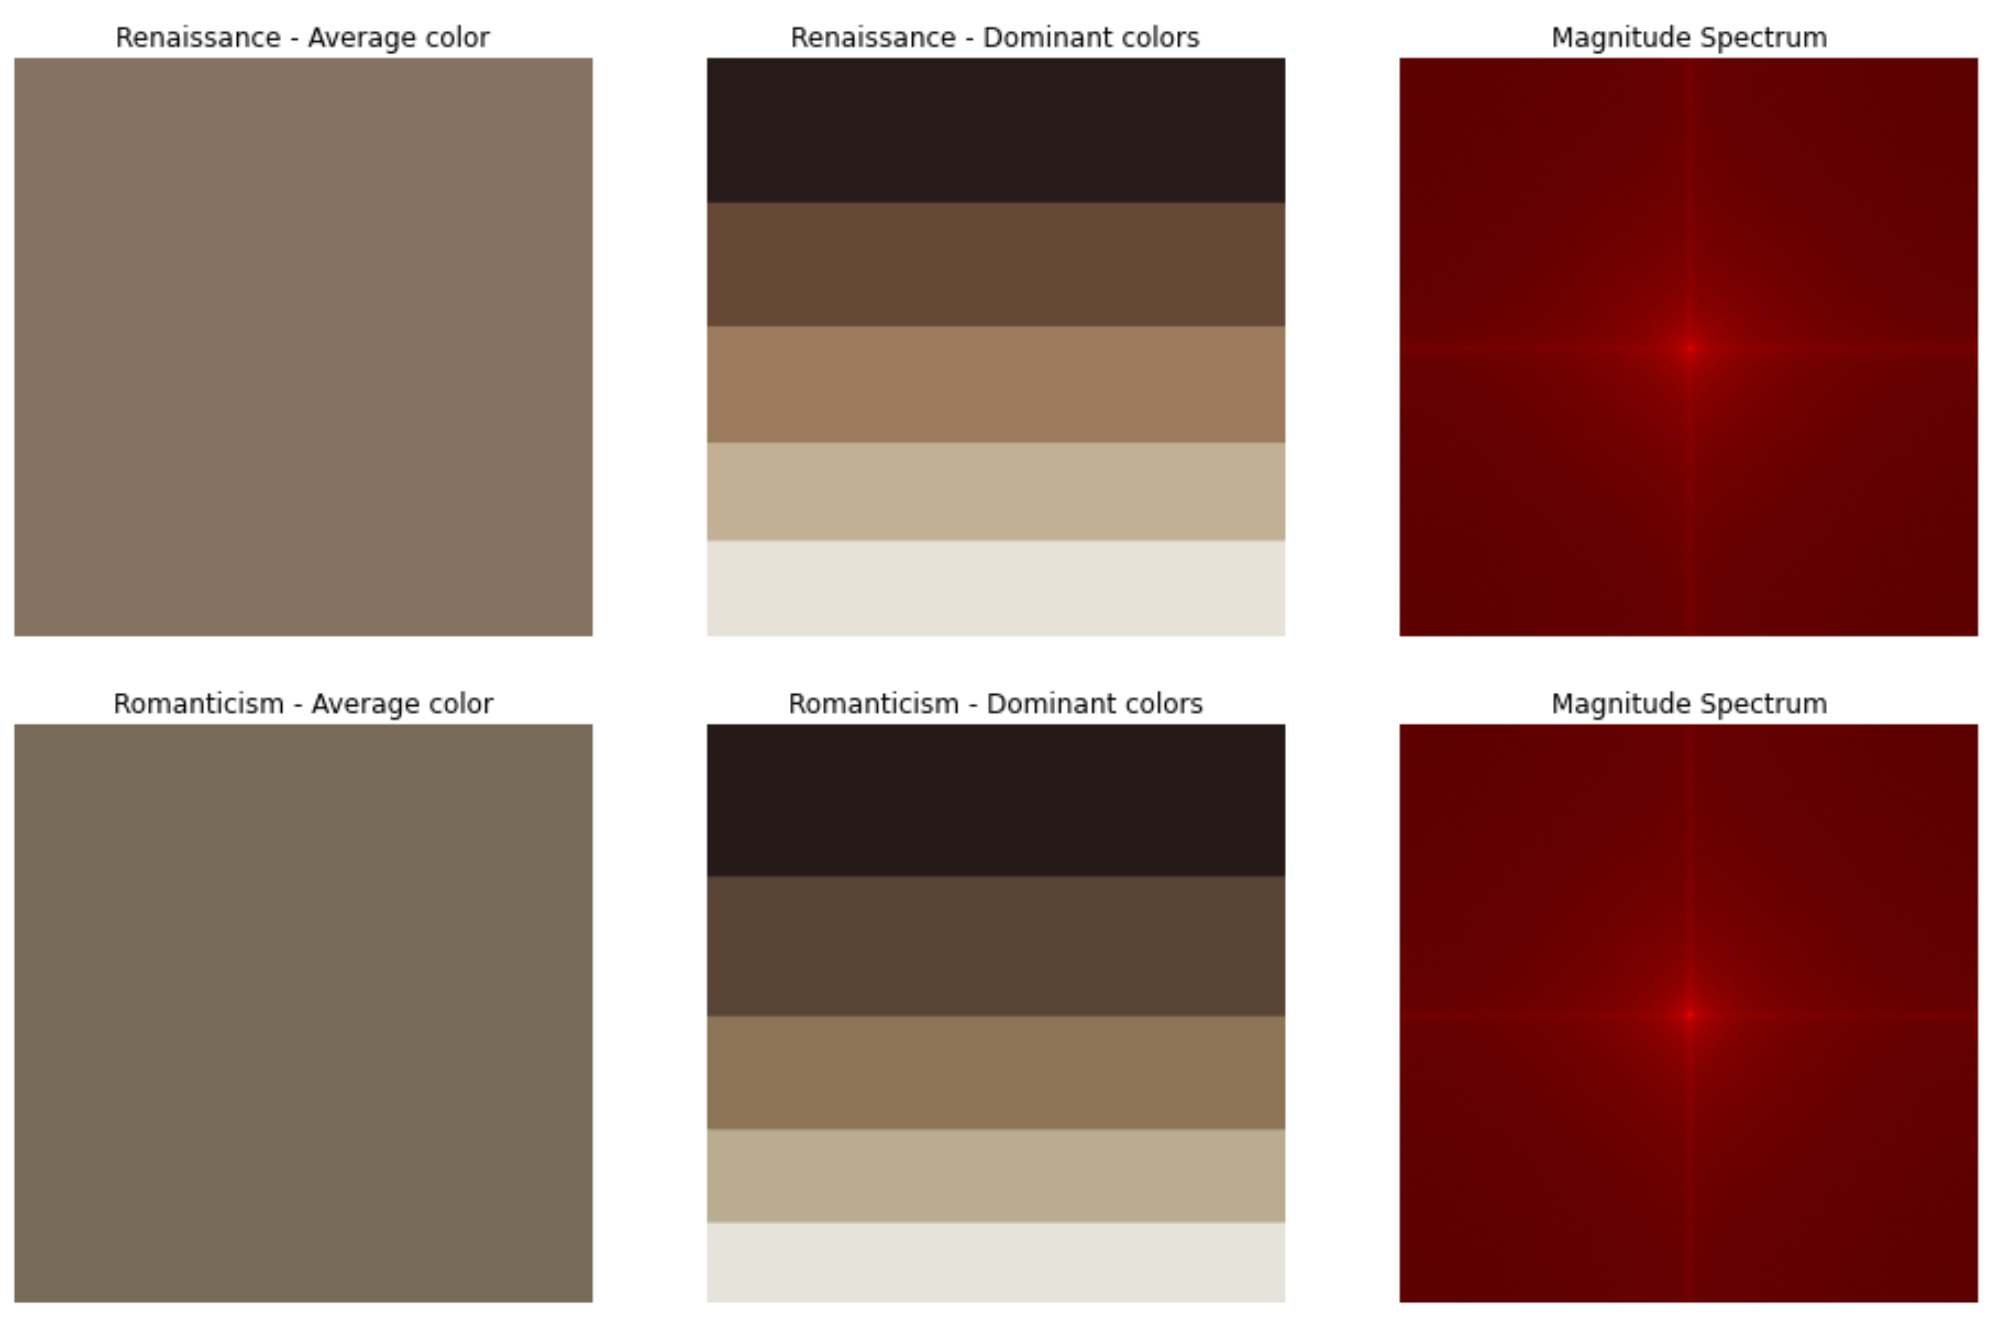

Here is an example on basic images (let's consider the movement's dominants colors representation as a basic image made of simple horizontal color bands):

<div>
<img src=attachment:image.png width="400"/>
</div>
*NB : factor 6 is applied to magnify difference in comparison*
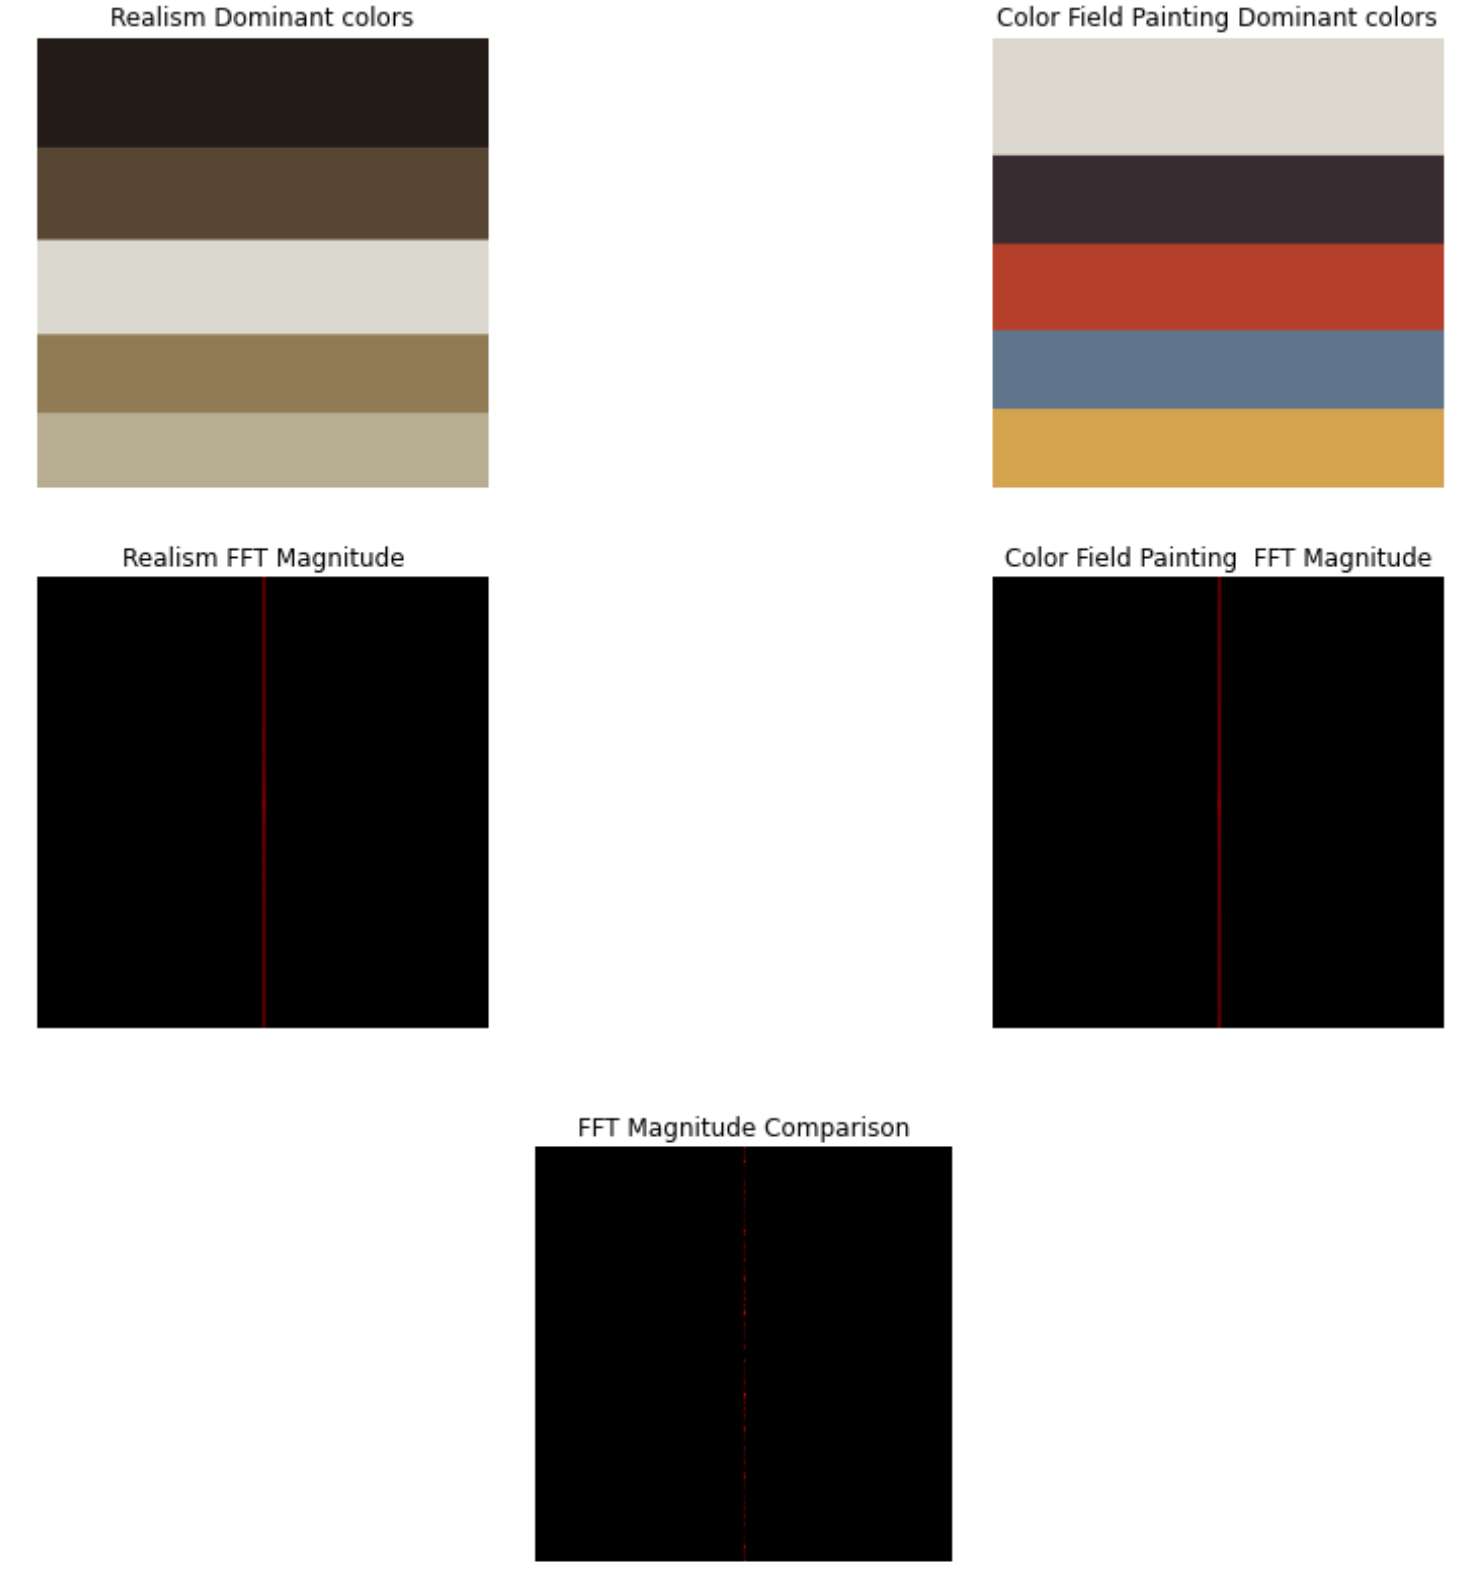

Some references :
<blockquote>  
    
[http://webia.lip6.fr/~thomen/Teaching/BIMA/cours/Fourier_1.pdf](http://webia.lip6.fr/~thomen/Teaching/BIMA/cours/Fourier_1.pdf)  

[https://www.f-legrand.fr/scidoc/docimg/numerique/tfd/tfdimage/tfdimage.html](https://www.f-legrand.fr/scidoc/docimg/numerique/tfd/tfdimage/tfdimage.html)

[https://www.cs.unm.edu/~brayer/vision/fourier.html](https://www.cs.unm.edu/~brayer/vision/fourier.html)

[https://www.youtube.com/watch?v=fRjFwTbJfes](https://www.youtube.com/watch?v=fRjFwTbJfes)</blockquote>

# Baseline Package

##### Imports and Initialization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ../..

/Users/q/code/gregoirelafay/neural-art


In [3]:
import pandas as pd
import os

In [4]:
MAIN_PATH = "../neural-art/data/wikiart/"
IMAGE_FOLDER_ALL=os.path.join(MAIN_PATH,"dataset")
IMAGE_FOLDER_PATH = os.path.join(MAIN_PATH,"wikiart-movement-genre_True-class_8-merge_mov-1-n_200_max")
IMAGE_FOLDER_PATH_SPLIT = os.path.join(MAIN_PATH,"train_val_test_True_200")
CSV_PATH = os.path.join(MAIN_PATH,"wikiart-movement-genre_True-class_8-merge_mov-1-n_200_max_split.csv")

In [5]:
from neuralart.fourier import *
from neuralart.baseline import *


##### Prediction for a dataset

In [6]:
#Load data
df=pd.read_csv(CSV_PATH)

In [7]:
#Class instance for baseline
baseline=Baseline(df,path=IMAGE_FOLDER_PATH_SPLIT)

In [8]:
#Occurence of paintings in Train set
baseline_mov, baseline_gen = baseline.occurence()
print(baseline_mov)
print(baseline_gen)

{'abstract': 0.125, 'color_field_painting': 0.125, 'cubism': 0.125, 'expressionism': 0.125, 'impressionism': 0.125, 'realism': 0.125, 'renaissance': 0.125, 'romanticism': 0.125}
{'abstract_painting': 0.249375, 'cityscape': 0.049375, 'genre_painting': 0.1175, 'illustration': 0.020625, 'landscape': 0.136875, 'nude_painting': 0.03, 'portrait': 0.1725, 'religious_painting': 0.10125, 'sketch_and_study': 0.0625, 'still_life': 0.06}


In [9]:
#Compute baseline dictionnary for prediction calculations  - not mandatory since this function is integrated in the prediction
basedict=baseline.basedict()

2021-09-02 10:06:14.586013: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-02 10:06:14.586496: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.
/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/PIL/Image.py:2914: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [10]:
#Compute prediction for the entire dataset
prediction=baseline.prediction()

In [11]:
prediction

{'avg_color_pred': 0.18125, 'dom_color_pred': 0.225, 'fft_pred': 0.25}

##### Prediction for an image

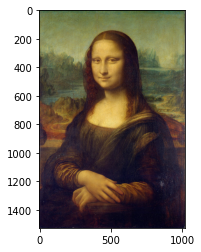

In [12]:
img_name='expressionism_jean-paul-lemieux_jeune-fille-au-chandail-rouge-1974.jpg'
test_img1=plt.imread(IMAGE_FOLDER_ALL+'/'+img_name)

plt.imshow(test_img1);

In [13]:
#Extract colors and shapes from image

test1=baselines_single(test_img1)

2021-09-06 20:13:09.922295: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-06 20:13:09.924838: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


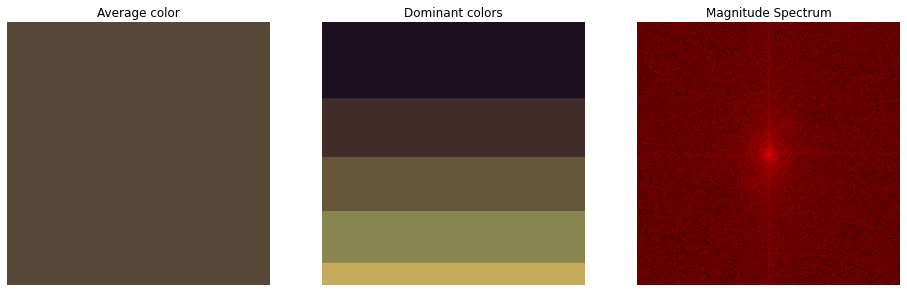

In [21]:
#show image and save analysis
baselines_viz_single(test1,plot_save=False)

In [22]:
#Load baseline dictionnary

base_dict=basedict_loader()

In [23]:
#Make prediction on the image from movements baseline using computed baseline dictionnary

test1_pred_avg=base_pred_avg(test1,base_dict)
test1_pred_dom=base_pred_dom(test1,base_dict)
test1_pred_fft=base_pred_fft(test1,base_dict)
test1_pred_avg,test1_pred_dom,test1_pred_fft

('romanticism', 'renaissance', 'romanticism')